# Simple tests and examples using Support Vector Machine

In [30]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.datasets import make_blobs # make data toy
from sklearn.datasets import make_circles # make data toy
from sklearn.svm import SVC # support vector classifier #help(SVC)
from sklearn.datasets import fetch_lfw_people # data to FaceRecognition,Labeled Faces in the Wild (LFW) people dataset (need to make download)
# to plt.imshow can be necessary install pil (python imagining library), pillow
# In acaconda can be executed: "conda install pillow"

from sklearn.decomposition import PCA #Principal Component Analysis

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:

X, y = make_blobs(50, centers=2, random_state=0, cluster_std=0.6) # make data toy

# creating dataFrame wiht the data, just for visualize
data_features = pd.DataFrame(X, columns=['feature1','feautre2']); 
data_label = pd.DataFrame(y, columns=['label']); 
data = pd.concat([data_features, data_label], axis=1); 
data.head()

,feature1,feautre2,label
0,1.412816,1.530335,1
1,1.813361,1.631131,1
2,1.432893,4.376792,0
3,1.872718,4.180692,0
4,2.095178,1.079147,1


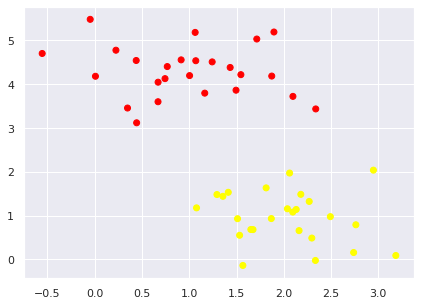

In [3]:

# plot scatter data

fig = plt.figure(figsize=(7,5))
plt.scatter(X[:,0], X[:,1], c=y, cmap='autumn')
plt.show()

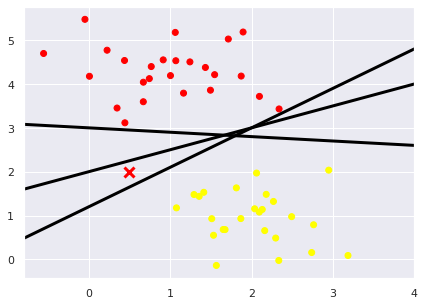

In [4]:

fig = plt.figure(figsize=(7,5))
plt.scatter(X[:,0], X[:,1], c=y, cmap='autumn') # pontos de dados
plt.plot([0.5],[2.0], 'x', c='red', markersize=10, markeredgewidth=3) # marcador X

xfit = np.linspace(-0.8,4,100) # valores de x para o plot das linhas


for a, b in [[0.5,2], [0.9,1.2],[-0.1,3]]: # a: coeficiente angular, b: coeficiente linear
    y_line = a * xfit + b # y = ax + b
    plt.plot(xfit, y_line, lw=3, c='black') # plot das linhas

# limites de x
plt.xlim([xfit.min(), xfit.max()])
plt.show()


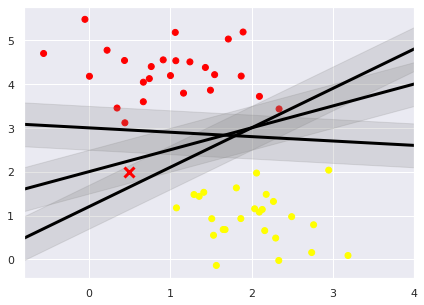

In [5]:

fig = plt.figure(figsize=(7,5))
plt.scatter(X[:,0], X[:,1], c=y, cmap='autumn') # pontos de dados
plt.plot([0.5],[2.0], 'x', c='red', markersize=10, markeredgewidth=3) # marcador X

xfit = np.linspace(-0.8,4,100) # valores de x para o plot das linhas


for a, b, d in [[0.5,2, 0.5], [0.9,1.2,0.5],[-0.1,3,0.5]]: # a: coeficiente angular, b: coeficiente linear, d: intervalo fill_between
    y_line = a * xfit + b # y = ax + b
    plt.plot(xfit, y_line, lw=3, c='black') # plot das linhas
    plt.fill_between(xfit, y_line - d, y_line + d, alpha=0.2, edgecolor=None, color='gray')

plt.xlim([xfit.min(),xfit.max()]) # limites de x
plt.show()

"In support vector machines, the line that maximizes this margin is the one we will choose as the optimal model. Support vector machines are an example of such a maximum margin estimator." [1]

In [6]:

model_svc = SVC(kernel='linear', C=1e10)
model_svc.fit(X,y)

SVC(C=10000000000.0, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [7]:

y_predicted_test = model_svc.predict(X)
y_predicted_test

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0])

In [8]:

print('coef: ',model_svc.coef_) # observe que o número de coeficientes está relacionando ao número de features
print('Intercept: ', model_svc.intercept_)


# Como foi usado um dataset com 2 features, será gerado uma função do tipo z = f(x,y) = ax + by + c, podendo
# então serem plotadas utilizando uma superficie, 3D, ou através de linhas de contorno, 2D, como é feito abaixo utilizando
# plt.contour()

coef:  [[ 0.23525694 -1.41250783]]
Intercept:  [3.29634152]


(-0.8, 4.0)

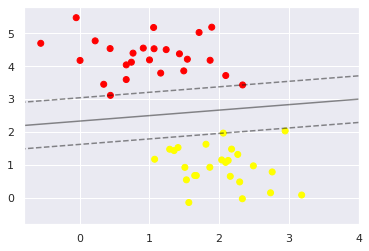

In [9]:

xfit2 = np.linspace(-0.8,4,50)
yfit2 = np.linspace(-0.8,4,50)

xGrid, yGrid = np.meshgrid(xfit2,yfit2)

parOrdXY = np.vstack([xGrid.ravel(), yGrid.ravel()]).T
P = model_svc.decision_function(parOrdXY).reshape(xGrid.shape)

# Observe que a linha logo acima em que é definido P tem o mesmo efeito que a linha logo abaixo,
# em que é definido y_fit2

#y_fit2 = (model_svc.coef_[0][0]*xGrid + model_svc.coef_[0][1]*yGrid + model_svc.intercept_[0]).reshape(xGrid.shape)


plt.scatter(X[:,0], X[:,1], c=y, cmap='autumn')
plt.contour(xGrid, yGrid, P, levels=[-1,0,1], linestyles=['--','-','--'], colors='k', alpha=0.5)

# caso fosse utilizado y_fit2
#plt.contour(xGrid, yGrid, y_fit2, levels=[-1,0,1], linestyles=['--','-','--'], colors='k', alpha=0.5)

plt.xlim([xfit2.min(),xfit2.max()]) # x limites

# abaixo é definida uma função mais generica para essa tarefa, consulte a referência [1]


In [10]:

def plot_svc(model, axe=None, suppport_vectors=True):
    '''Plot Support Vector Classifier 2D'''
    
    # verificando o eixo para plotagem
    if axe is None:
        axe = plt.gca() # get current axis
    
    xlim = axe.get_xlim()
    ylim = axe.get_ylim()
        
    # difinindo grids e a a função z = f(x,y)
    x = np.linspace(xlim[0], xlim[1],50)
    y = np.linspace(ylim[0], ylim[1],50)
    xGrid, yGrid = np.meshgrid(x,y)
    parOrdenadoXY = np.vstack([xGrid.ravel(), yGrid.ravel()]).T
    Z = model.decision_function(parOrdenadoXY).reshape(xGrid.shape)
    
    # plotagem 
    axe.contour(xGrid, yGrid, Z, colors='k', levels=[-1,0,1], linestyles=['--','-','--'])
    
    # plotagem support vectors
    if suppport_vectors:
        axe.scatter(model.support_vectors_[:,0], model.support_vectors_[:,1], s = 400, facecolor='none', edgecolor='black')
    
    # definindo limites dos eixos
    axe.set_xlim(xlim)
    axe.set_ylim(ylim)
        


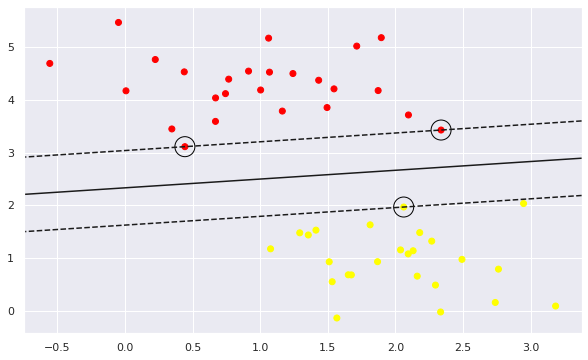

In [11]:

fig = plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1], c=y, cmap='autumn')
plot_svc(model_svc)
plt.show()

"Notice that a few of the training points just touch the margin: they are indicated by the black circles in this figure. These points are the pivotal elements of this fit, and are known as the support vectors, and give the algorithm its name."[1]

In [12]:
print('Support vectors (x,y):\n',model_svc.support_vectors_)

Support vectors (x,y):
 [[0.44359863 3.11530945]
 [2.33812285 3.43116792]
 [2.06156753 1.96918596]]


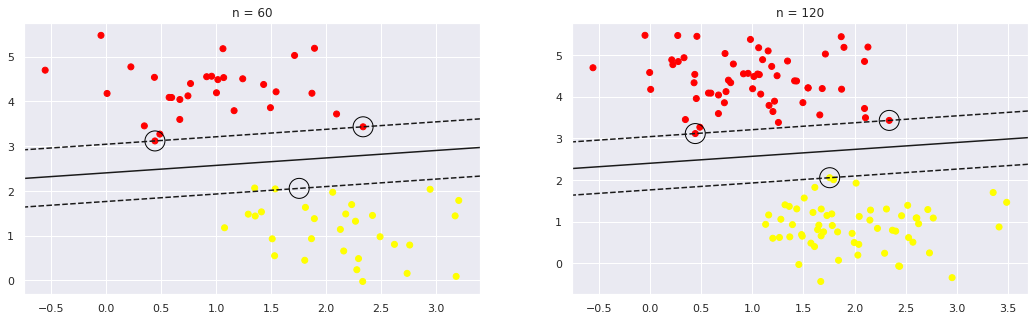

In [13]:

x60, y60 = make_blobs(60, random_state=0, centers=2, cluster_std=0.6)
x120, y120 = make_blobs(120, random_state=0, centers=2, cluster_std=0.6)



model_svc_60 = model_svc.fit(x60, y60)
model_svc_120 = model_svc.fit(x120, y120)

fig, (axe1, axe2) = plt.subplots(1,2, figsize=(18,5))

axe1.scatter(x60[:,0], x60[:,1], c=y60, cmap='autumn')
axe1.set_title('n = 60')
plot_svc(model_svc_60, axe=axe1)

axe2.scatter(x120[:,0], x120[:,1], c=y120, cmap='autumn')
axe2.set_title('n = 120')
plot_svc(model_svc_120, axe=axe2)


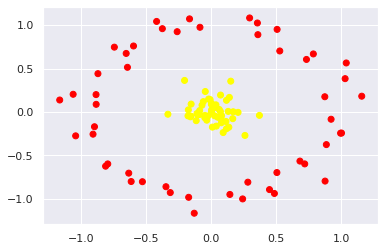

In [14]:

X, y = make_circles(random_state=42, noise=0.1, factor=0.1)

plt.scatter(X[:,0],X[:,1], c=y, cmap='autumn')

In [15]:

# rbf: radial basis function, para mais detalhes consulte "Beyond linear boundaries: Kernel SVM" em [1]
model_svc_RBF = SVC(kernel='rbf', C=1e6)
model_svc_RBF.fit(X, y)


SVC(C=1000000.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

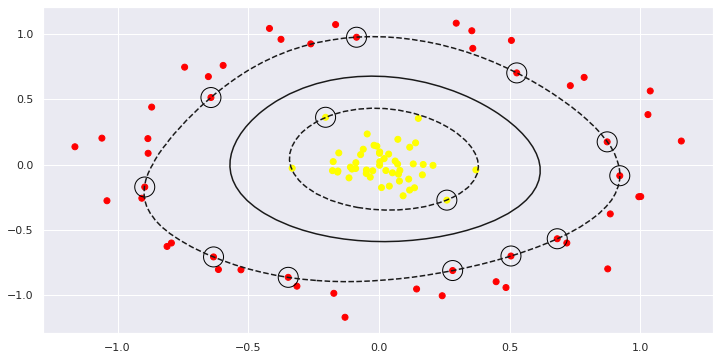

In [16]:

fig = plt.figure(figsize=(12,6))
plt.scatter(X[:,0], X[:,1], c=y, cmap='autumn')
plot_svc(model_svc_RBF)



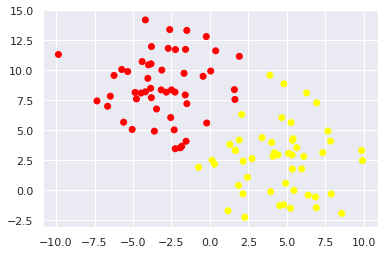

In [17]:

X, y = make_blobs(centers=2, cluster_std=2.8, random_state=42)

plt.scatter(X[:,0],X[:,1], c=y, cmap='autumn')

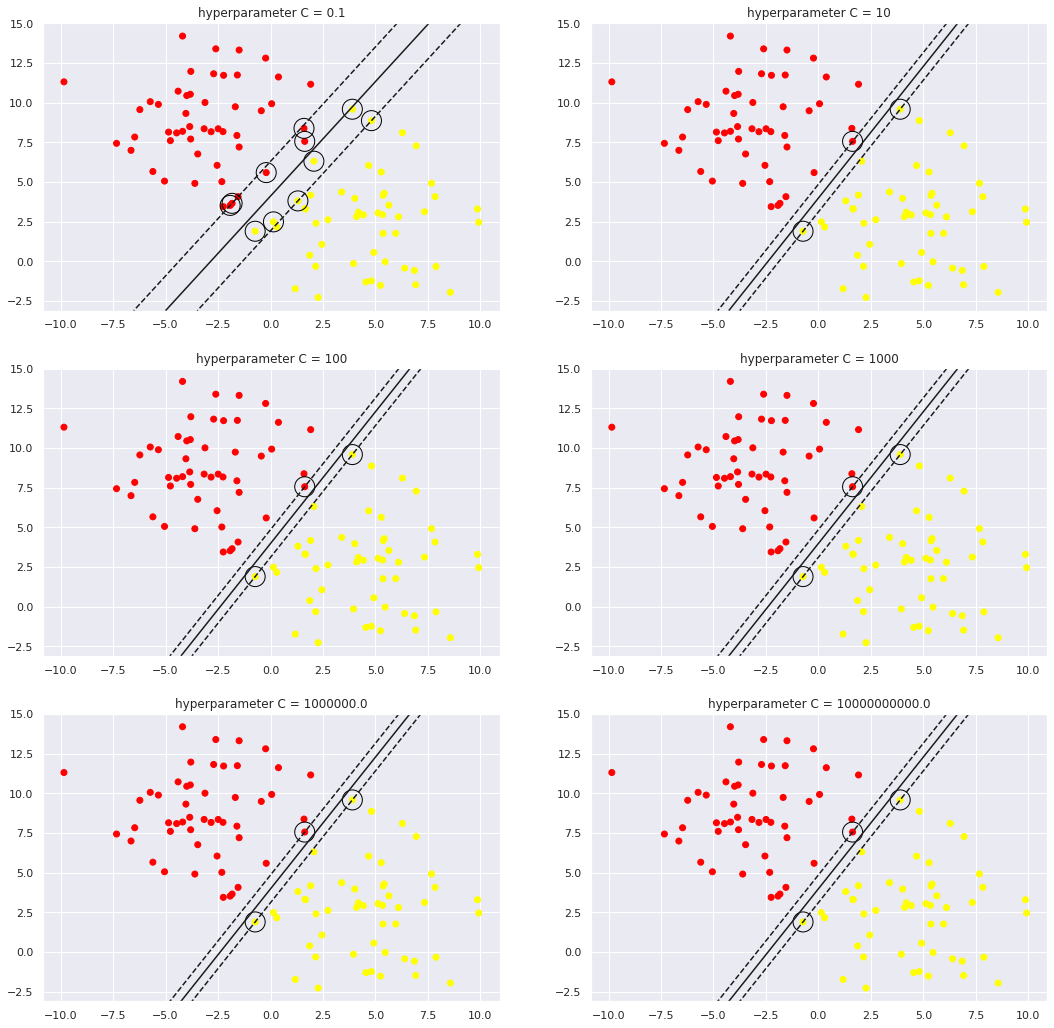

In [18]:

# looking hyperparameter C, look "Tuning the SVM: Softening Margins" in [1] to more details

values_C = [0.1,10,100,1000,1e6,1e10]


fig, axe = plt.subplots(3,2, figsize=(18,18))

for ax, C in zip(axe.flat, values_C):
    model_svc = SVC(kernel='linear', C=C)
    model_svc.fit(X, y)
    ax.scatter(X[:,0],X[:,1], c=y, cmap='autumn')
    ax.set_title("hyperparameter C = {0}".format(C))
    plot_svc(model_svc, axe=ax)

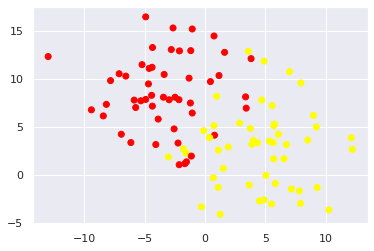

In [19]:

# data overlap

X, y = make_blobs(random_state=42, centers=2, cluster_std=4)

plt.scatter(X[:,0],X[:,1], c=y, cmap='autumn')


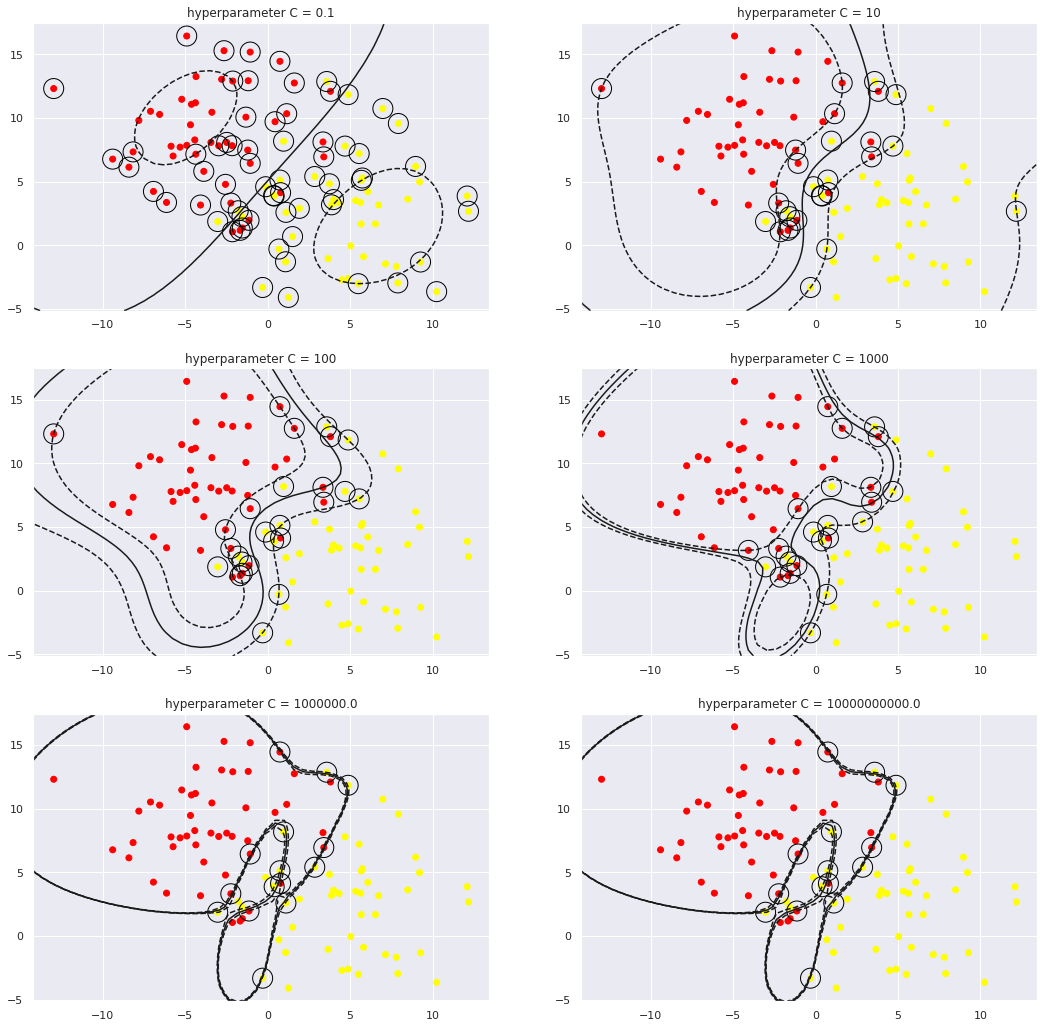

In [20]:

# looking hyperparameter C, data overlap

values_C = [0.1,10,100,1000,1e6,1e10]


fig, axe = plt.subplots(3,2, figsize=(18,18))

for ax, C in zip(axe.flat, values_C):
    model_svc_overlap = SVC(kernel='rbf', C=C)
    model_svc_overlap.fit(X, y)
    ax.scatter(X[:,0],X[:,1], c=y, cmap='autumn')
    ax.set_title("hyperparameter C = {0}".format(C))
    plot_svc(model_svc_overlap, axe=ax)


## Example: Face Recognition, reference [1] to more detail

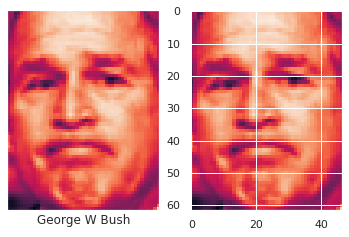

In [21]:

dataFR = fetch_lfw_people(min_faces_per_person=100) # to more detail acess [2] or try help(fetch_lfw_people)

# example

fig, (axe1,axe2) = plt.subplots(1,2)
axe1.imshow(dataFR.data[0].reshape(62,47)) # can necessary install pil (pillow)
axe1.set(xticks=[], yticks=[], xlabel=dataFR.target_names[dataFR.target[0]])
axe2.imshow(dataFR.images[0]) # have the same effect of line in axe1.imshow

In [41]:
print('DataFR shape: ',dataFR.data.shape)
print('DataFR.target_names: ', dataFR.target_names)

DataFR shape:  (1140, 2914)
DataFR.target_names:  ['Colin Powell' 'Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder'
 'Tony Blair']


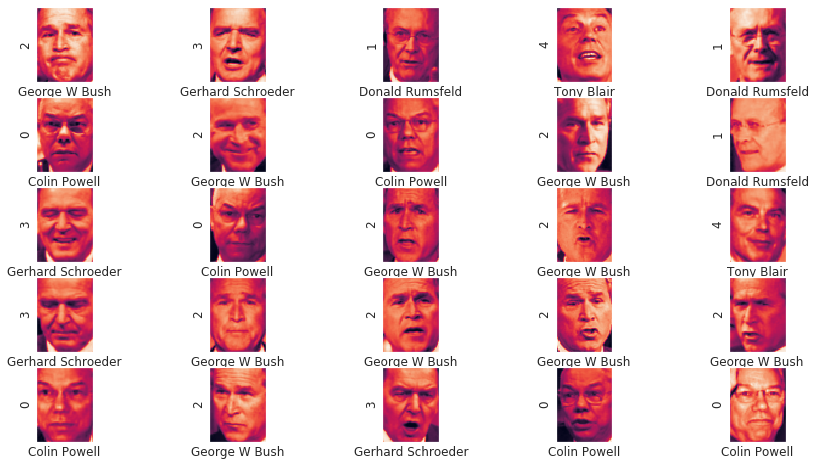

In [23]:

# looking some images in our dataFR (the 25 first images)

fig, axe = plt.subplots(5,5, figsize=(15,8))
for i, ax in enumerate(axe.flat):
    ax.imshow(dataFR.images[i])
    ax.set(xticks=[],yticks=[], 
           xlabel=dataFR.target_names[dataFR.target[i]], # name person in data
          ylabel=dataFR.target[i]) # id person in data


In [24]:

# Repare that each image have 62x47, 2914 pixel, here we will use PCA to get 150 meaning features of that set

pca = PCA(n_components=300, whiten=True, random_state=42)
x_new = pca.fit_transform(dataFR.data)

print('Data shape before PCA: ', dataFR.data.shape)
print('Data shape after PCA: ',x_new.shape)

Data shape before PCA:  (1140, 2914)
Data shape after PCA:  (1140, 300)


In [26]:

# split data train and test
x_train, x_test, y_train, y_test = train_test_split(x_new, dataFR.target, test_size=0.2)

In [27]:

# model SVC

model_SVC_FR = SVC()
model_SVC_FR.fit(x_train, y_train)



SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [31]:

y_model = model_SVC_FR.predict(x_test)


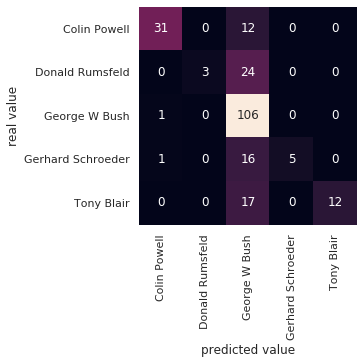

In [61]:

# matrix de confusão
mat = confusion_matrix(y_test, y_model)

sns.heatmap(mat, annot=True, cbar=False, square=True, fmt='d',
           xticklabels=dataFR.target_names,
           yticklabels=dataFR.target_names)
plt.xlabel('predicted value')
plt.ylabel('real value')
plt.show()

In [62]:
#model_svc.classes_
#help(SVC)
#help(make_circles)
#help(make_blobs)
#help(fetch_lfw_people)
#help(PCA)
#help(train_test_split)
#help(confusion_matrix)
#help(sns.heatmap)


# References

[1]https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html
<br>
[2]https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_lfw_people.html
<br>